## Analyzing Key NBA Statistics

In [3]:
# This imports the client
from basketball_reference_web_scraper import client

In [4]:
from basketball_reference_web_scraper import client

# Get 2017-2018 advanced season statistics for all players
data = client.players_advanced_season_totals(season_end_year=2018)

# The players_advanced_season_totals method also supports all output behavior previously described


from basketball_reference_web_scraper import client

# Get 2017-2018 season totals for all players
data2 = client.players_season_totals(season_end_year=2018)

# The players_season_totals method also supports all output behavior previously described


In [5]:
# load the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Turn numpy array into dataframe
nba = pd.DataFrame(data=data, index=None)
nba.head(5)

,slug,name,positions,age,team,games_played,minutes_played,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,...,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player
0,abrinal01,Álex Abrines,[Position.SHOOTING_GUARD],24,Team.OKLAHOMA_CITY_THUNDER,75,1134,9.0,0.567,0.759,...,7.4,12.7,1.3,1.0,2.2,0.094,-1.9,0.4,-1.5,0.1
1,acyqu01,Quincy Acy,[Position.POWER_FORWARD],27,Team.BROOKLYN_NETS,70,1359,8.2,0.525,0.800,...,13.3,14.4,-0.1,1.1,1.0,0.036,-2.6,0.1,-2.5,-0.2
2,adamsst01,Steven Adams,[Position.CENTER],24,Team.OKLAHOMA_CITY_THUNDER,76,2487,20.6,0.630,0.003,...,13.3,16.7,6.7,3.0,9.7,0.187,1.7,-0.6,1.1,2.0
3,adebaba01,Bam Adebayo,[Position.CENTER],20,Team.MIAMI_HEAT,69,1368,15.7,0.570,0.021,...,13.6,15.9,2.3,1.9,4.2,0.148,-1.1,0.7,-0.4,0.6
4,afflaar01,Arron Afflalo,[Position.SHOOTING_GUARD],32,Team.ORLANDO_MAGIC,53,682,5.8,0.516,0.432,...,10.8,12.5,-0.1,0.2,0.1,0.009,-3.8,-1.5,-5.4,-0.6


In [7]:
#Check the data types
nba.dtypes

slug                              object
name                              object
positions                         object
age                                int64
team                              object
games_played                       int64
minutes_played                     int64
player_efficiency_rating         float64
true_shooting_percentage         float64
three_point_attempt_rate         float64
free_throw_attempt_rate          float64
offensive_rebound_percentage     float64
defensive_rebound_percentage     float64
total_rebound_percentage         float64
assist_percentage                float64
steal_percentage                 float64
block_percentage                 float64
turnover_percentage              float64
usage_percentage                 float64
offensive_win_shares             float64
defensive_win_shares             float64
win_shares                       float64
win_shares_per_48_minutes        float64
offensive_box_plus_minus         float64
defensive_box_pl

In [8]:
#Check num values
nba.isnull().sum()

slug                             0
name                             0
positions                        0
age                              0
team                             0
games_played                     0
minutes_played                   0
player_efficiency_rating         0
true_shooting_percentage         0
three_point_attempt_rate         0
free_throw_attempt_rate          0
offensive_rebound_percentage     0
defensive_rebound_percentage     0
total_rebound_percentage         0
assist_percentage                0
steal_percentage                 0
block_percentage                 0
turnover_percentage              0
usage_percentage                 0
offensive_win_shares             0
defensive_win_shares             0
win_shares                       0
win_shares_per_48_minutes        0
offensive_box_plus_minus         0
defensive_box_plus_minus         0
box_plus_minus                   0
value_over_replacement_player    0
dtype: int64

#### Now, I would like to look at some features that interact well with PER statistics. PER has become the most commonly used advanced metric. PER measures a player's per-minute productivity.PER takes into account accomplishments, such as field goals, 3-pointers, assists, rebounds, blocks and steals, and negative results, such as missed shots, turnovers and personal fouls. Top players can generally be found at the top of the list, so its a nice snapshot of where players stand in relationship to one another.

In [9]:
#Remove players that have not played more than half of the nba games in 2017
nbadata = nba[nba['games_played']>42]
nbadata.head()

,slug,name,positions,age,team,games_played,minutes_played,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,...,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player
0,abrinal01,Álex Abrines,[Position.SHOOTING_GUARD],24,Team.OKLAHOMA_CITY_THUNDER,75,1134,9.0,0.567,0.759,...,7.4,12.7,1.3,1.0,2.2,0.094,-1.9,0.4,-1.5,0.1
1,acyqu01,Quincy Acy,[Position.POWER_FORWARD],27,Team.BROOKLYN_NETS,70,1359,8.2,0.525,0.800,...,13.3,14.4,-0.1,1.1,1.0,0.036,-2.6,0.1,-2.5,-0.2
2,adamsst01,Steven Adams,[Position.CENTER],24,Team.OKLAHOMA_CITY_THUNDER,76,2487,20.6,0.630,0.003,...,13.3,16.7,6.7,3.0,9.7,0.187,1.7,-0.6,1.1,2.0
3,adebaba01,Bam Adebayo,[Position.CENTER],20,Team.MIAMI_HEAT,69,1368,15.7,0.570,0.021,...,13.6,15.9,2.3,1.9,4.2,0.148,-1.1,0.7,-0.4,0.6
4,afflaar01,Arron Afflalo,[Position.SHOOTING_GUARD],32,Team.ORLANDO_MAGIC,53,682,5.8,0.516,0.432,...,10.8,12.5,-0.1,0.2,0.1,0.009,-3.8,-1.5,-5.4,-0.6


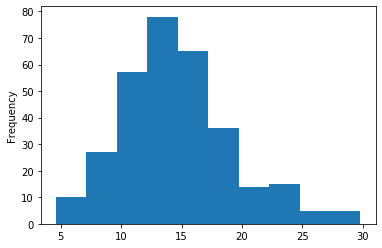

In [48]:
# Distribution of PER among all players in the NBA
nbadata['player_efficiency_rating'].plot.hist()

In [10]:
from scipy import stats
stats.normaltest(nbadata['player_efficiency_rating'])

NormaltestResult(statistic=23.32911246443724, pvalue=8.593055059089773e-06)

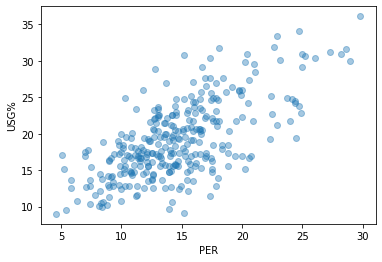

In [11]:
#Lets look at how player efficiency rating interacts with the other variables.
#Interaction with usage rate%
plt.scatter(nbadata['player_efficiency_rating'], nbadata['usage_percentage'], alpha=0.4)
plt.xlabel('PER')
plt.ylabel('USG%')
plt.show()

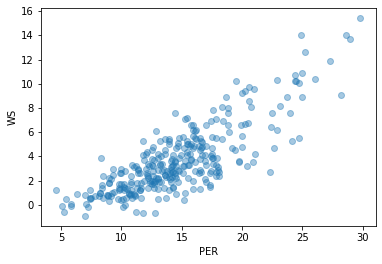

In [12]:
#Interaction with Win Share
plt.scatter(nbadata['player_efficiency_rating'], nbadata['win_shares'], alpha=0.4)
plt.xlabel('PER')
plt.ylabel('WS')
plt.show()

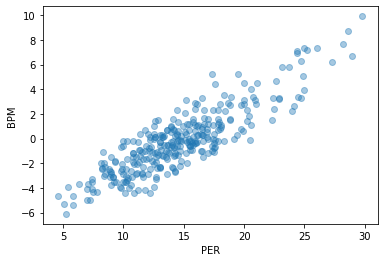

In [13]:
#Interaction with efficiency differential
plt.scatter(nbadata['player_efficiency_rating'], nbadata['box_plus_minus'], alpha=0.4)
plt.xlabel('PER')
plt.ylabel('BPM')
plt.show()

In [14]:
# I selected this variables because they are the most important advanced statistics and commonly used in the NBA.
nbaset = nbadata[['name', 'positions', 'team', 'player_efficiency_rating', 'usage_percentage', 'win_shares', 'box_plus_minus', 'value_over_replacement_player']]
nbaset.head()

,name,positions,team,player_efficiency_rating,usage_percentage,win_shares,box_plus_minus,value_over_replacement_player
0,Álex Abrines,[Position.SHOOTING_GUARD],Team.OKLAHOMA_CITY_THUNDER,9.0,12.7,2.2,-1.5,0.1
1,Quincy Acy,[Position.POWER_FORWARD],Team.BROOKLYN_NETS,8.2,14.4,1.0,-2.5,-0.2
2,Steven Adams,[Position.CENTER],Team.OKLAHOMA_CITY_THUNDER,20.6,16.7,9.7,1.1,2.0
3,Bam Adebayo,[Position.CENTER],Team.MIAMI_HEAT,15.7,15.9,4.2,-0.4,0.6
4,Arron Afflalo,[Position.SHOOTING_GUARD],Team.ORLANDO_MAGIC,5.8,12.5,0.1,-5.4,-0.6


In [15]:
nbaset.to_excel('nbaset.xlsx', index=False, header=True)

In [16]:
#Rename the columns
nbaset = nbaset.rename(columns={'player_efficiency_rating':'PER', 'usage_percentage':'USG%','win_shares':'WS','box_plus_minus':'BPM', 'value_over_replacement_player':'VOR'})

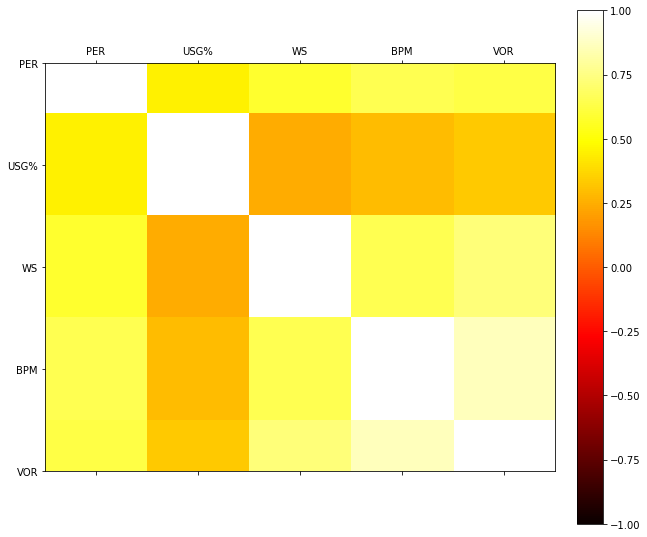

In [17]:
# Obtain figure associated with the plot we want to create
dfCorrelation = nbaset.corr('kendall')
fig = plt.figure()

# Create heatmap subplot  
plot_axes = fig.add_subplot(111) 
heatmap = plot_axes.matshow(dfCorrelation, vmin=-1, vmax=1, cmap='hot')

# Add a colorbar on the right based on the heatmap
fig.colorbar(heatmap, fraction=0.046, pad=0.04)

# Create labels with column names
ticks = np.arange(0, dfCorrelation.columns.size, 1) # create a numpy array from 0 to column size
plot_axes.set_xticks(ticks)
plot_axes.set_yticks(ticks)
plot_axes.set_yticklabels(dfCorrelation.columns.values)
plot_axes.set_xticklabels(dfCorrelation.columns.values)


# Set size
fig.set_size_inches((10,10))

In [25]:
# This data shows players in 2017-2018 season that were in the All NBA Team. 0 is a no and 1 as a yes.
dataset = pd.read_excel('nbaset.xlsx')
dataset.head()

,name,All_NBA_Team
0,Álex Abrines,0
1,Quincy Acy,0
2,Steven Adams,0
3,Bam Adebayo,0
4,Arron Afflalo,0


In [39]:
new_data = pd.merge(nbaset, dataset, on=['name'], how='left')
new_data.head()

,name,positions,team,PER,USG%,WS,BPM,VOR,All_NBA_Team
0,Álex Abrines,[Position.SHOOTING_GUARD],Team.OKLAHOMA_CITY_THUNDER,9.0,12.7,2.2,-1.5,0.1,0.0
1,Quincy Acy,[Position.POWER_FORWARD],Team.BROOKLYN_NETS,8.2,14.4,1.0,-2.5,-0.2,0.0
2,Steven Adams,[Position.CENTER],Team.OKLAHOMA_CITY_THUNDER,20.6,16.7,9.7,1.1,2.0,0.0
3,Bam Adebayo,[Position.CENTER],Team.MIAMI_HEAT,15.7,15.9,4.2,-0.4,0.6,0.0
4,Arron Afflalo,[Position.SHOOTING_GUARD],Team.ORLANDO_MAGIC,5.8,12.5,0.1,-5.4,-0.6,0.0


In [38]:
#Sort Values by PER
PER = new_data.sort_values(by=['PER'], ascending=False).head(10)
PER_new = PER[PER['All_NBA_Team'] == 1].shape[0]
print('The number of All NBA Team players that are in the top 10 are ' + str(PER_new))

The number of All NBA Team players that are in the top 10 are 9


In [28]:
#Sort Values by USG%
USG = new_data.sort_values(by=['USG%'], ascending=False).head(10)
USG_new = USG[USG['All_NBA_Team'] == 1].shape[0]
print('The number of All NBA Team players that are in the top 10 are ' + str(USG_new))

The number of All NBA Team players that are in the top 10 are 6


In [29]:
#Sort Values by WS
WS = new_data.sort_values(by=['WS'], ascending=False).head(10)
WS_new = WS[WS['All_NBA_Team'] == 1].shape[0]
print('The number of All NBA Team players that are in the top 10 are ' + str(WS_new))

The number of All NBA Team players that are in the top 10 are 8


In [30]:
#Sort Values by BPM
BPM = new_data.sort_values(by=['BPM'], ascending=False).head(10)
BPM_new = BPM[BPM['All_NBA_Team'] == 1].shape[0]
print('The number of All NBA Team players that are in the top 10 are ' + str(BPM_new))

The number of All NBA Team players that are in the top 10 are 7


In [32]:
#Sort Values by VOR
VOR = new_data.sort_values(by=['VOR'], ascending=False).head(10)
VOR_new = VOR[VOR['All_NBA_Team'] == 1].shape[0]
print('The number of All NBA Team players that are in the top 10 are ' + str(VOR_new))

The number of All NBA Team players that are in the top 10 are 9


In [42]:
#Top Player using PER
PER.head(1)

,name,positions,team,PER,USG%,WS,BPM,VOR,All_NBA_Team
123,James Harden,[Position.SHOOTING_GUARD],Team.HOUSTON_ROCKETS,29.8,36.1,15.4,9.9,7.7,1.0


In [43]:
#Top Player using USG
USG.head(1)

,name,positions,team,PER,USG%,WS,BPM,VOR,All_NBA_Team
123,James Harden,[Position.SHOOTING_GUARD],Team.HOUSTON_ROCKETS,29.8,36.1,15.4,9.9,7.7,1.0


In [44]:
#Top Player using WS
WS.head(1)

,name,positions,team,PER,USG%,WS,BPM,VOR,All_NBA_Team
123,James Harden,[Position.SHOOTING_GUARD],Team.HOUSTON_ROCKETS,29.8,36.1,15.4,9.9,7.7,1.0


In [45]:
#Top Player using BPM
BPM.head(1)

,name,positions,team,PER,USG%,WS,BPM,VOR,All_NBA_Team
123,James Harden,[Position.SHOOTING_GUARD],Team.HOUSTON_ROCKETS,29.8,36.1,15.4,9.9,7.7,1.0


In [46]:
#Top Player using VOR
VOR.head(1)

,name,positions,team,PER,USG%,WS,BPM,VOR,All_NBA_Team
155,LeBron James,[Position.POWER_FORWARD],Team.CLEVELAND_CAVALIERS,28.6,31.6,14.0,8.7,8.2,1.0


 ### CONCLUSION: We can conclude that the players who have played over 50% of games, while having a high PER or VOR statistics will have a 90% chance of making the ALl NBA Team. Also analyzing the number 1 player of each statistic showed that James Harden was the best player (9/10 statistics he was at the top of the list). He was also the MVP of NBA this year.